## Helper Functions

In [1]:
import matplotlib.pyplot as plt
import chess
import chess.svg
import random
import pandas as pd
import numpy as np
from IPython.display import SVG


In [2]:
fics = pd.read_csv("FICS_data_fixed_df.csv")
def generate_fics_group(move_list):
    if len(move_list) ==0:
        d =  fics.groupby(['move1w','5_q_buckets']).agg({'5_q_buckets' : np.size})
        d = d / d.groupby(level=1).sum()
        d = d.unstack(level=1)
        return d
    elif len(move_list) ==1 :
        d =  fics[(fics['move1w'] == move_list[0])].groupby(['move1b','5_q_buckets']).agg({'5_q_buckets' : np.size})
        d = d / d.groupby(level=1).sum()
        d = d.unstack(level=1)
        return d
    elif len(move_list) ==2:
        d = fics[ (fics['move1w'] == move_list[0]) & (fics['move1b'] == move_list[1]) ].groupby(['move2w','5_q_buckets']).agg({'5_q_buckets' : np.size})
        d = d / d.groupby(level=1).sum()
        d=d.unstack(level=1)
        return d
    elif len(move_list) ==3:
        d = fics[(fics['move1w'] == move_list[0]) & (fics['move1b'] == move_list[1]) & 
              (fics['move2w'] == move_list[2])].groupby(['move2b','5_q_buckets']).agg({'5_q_buckets' : np.size})
        d = d / d.groupby(level=1).sum()
        d=d.unstack(level=1)
        return d
    elif len(move_list) ==4:
        d = fics[(fics['move1w'] == move_list[0]) & (fics['move1b'] == move_list[1]) & 
              (fics['move2w'] == move_list[2]) &(fics['move2b'] == move_list[3]) ].groupby(['move3w','5_q_buckets']).agg({'5_q_buckets' : np.size})
        d = d / d.groupby(level=1).sum()
        d=d.unstack(level=1)
        return d
    elif len(move_list) ==5:
        d = fics[(fics['move1w'] == move_list[0]) & (fics['move1b'] == move_list[1]) & 
              (fics['move2w'] == move_list[2]) &(fics['move2b'] == move_list[3]) & 
              (fics['move3w'] == move_list[4])].groupby(['move3b','5_q_buckets']).agg({'5_q_buckets' : np.size})
        d = d / d.groupby(level=1).sum()
        d=d.unstack(level=1)
        return d
    elif len(move_list) ==6:
        d = fics[(fics['move1w'] == move_list[0]) & (fics['move1b'] == move_list[1]) & 
              (fics['move2w'] == move_list[2]) &(fics['move2b'] == move_list[3]) & 
              (fics['move3w'] == move_list[4]) &(fics['move3b'] == move_list[5])].groupby(['move4w','5_q_buckets']).agg({'5_q_buckets' : np.size})
        d = d / d.groupby(level=1).sum()
        d=d.unstack(level=1)
        return d
    elif len(move_list) ==7:
        d = fics[(fics['move1w'] == move_list[0]) & (fics['move1b'] == move_list[1]) & 
              (fics['move2w'] == move_list[2]) &(fics['move2b'] == move_list[3]) & 
              (fics['move3w'] == move_list[4]) &(fics['move3b'] == move_list[5]) &
              (fics['move4w'] == move_list[4])].groupby(['move4b','5_q_buckets']).agg({'5_q_buckets' : np.size})
        d = d / d.groupby(level=1).sum()
        d=d.unstack(level=1)
        return d
def generate_fics_chart(move_list):
   
    s = generate_fics_group(move_list).plot(kind='bar', title=generate_fics_title(move_list),
                                       legend =False)
    plt.legend( ('High Elo',"Low Elo") )
    plt.ylabel("Percent Move is Played")
    if len(move_list) % 2 ==0:
        plt.xlabel("Move for White")
    else:
        plt.xlabel("Move for Black")
    vals = s.get_yticks()
    s.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
    plt.show();
    
def generate_fics_title(move_list):
    s = ""
    if len(move_list) % 2 == 0:
        s+= "Most Common Moves for White Following "
    else:
        s+= "Most Common Moves for Black Following "
    if len(move_list) == 1:
        s+= ("1." + move_list[0])
    if len(move_list) == 2:
        s+= ("1." + move_list[0]+ " " + move_list[1])
    if len(move_list) ==3:
        s+= ("1." + move_list[0]+ " " + move_list[1]+" 2." + move_list[2])
    if len(move_list) ==4:
        s+= ("1." + move_list[0]+ " " + move_list[1]+" 2." + move_list[2] +
            " " + move_list[3])
    if len(move_list) ==6:
        s+= ("1." + move_list[0]+ " " + move_list[1]+" 2." + move_list[2] +
            " " + move_list[3]+ " 3." + move_list[4])
    if len(move_list) ==6:
        s+= ("1." + move_list[0]+ " " + move_list[1]+" 2." + move_list[2] +
            " " + move_list[3]+ " 3." + move_list[4] +" " + move_list[5])
    if len(move_list) ==7:
        s+= ("1." + move_list[0]+ " " + move_list[1]+" 2." + move_list[2] +
            " " + move_list[3]+ " 3." + move_list[4] +" " + move_list[5] +
            " 4."+ move_list[6])
    if len(move_list) ==8:
        s+= ("1." + move_list[0]+ " " + move_list[1]+" 2." + move_list[2] +
            " " + move_list[3]+ " 3." + move_list[4] +" " + move_list[5] +
            " 4."+move_list[6] + " "+move_list[7])
        
    return s

In [3]:
df = pd.read_csv('chessdb0-1',index_col=0)

def generate_high_elo_moves(d):
    move = np.random.choice(d.index.values,1,replace=False, p= d['move_p'].values)
    return move[0]

def generate_high_elo_weighted_moves(move_list):
    if len(move_list) == 0:
        d = generate_high_elo_groups(move_list)
        d.index.values, d['move_p'].values
        return generate_high_elo_moves(d)
    elif len(move_list) == 1:
        d = generate_high_elo_groups(move_list)
        d['move_p'] = d['Num Games'] / d['Num Games'].sum()
        return generate_high_elo_moves(d)
    elif len(move_list) == 2:
        d = generate_high_elo_groups(move_list)
        d['move_p'] = d['Num Games'] / d['Num Games'].sum()
        return generate_high_elo_moves(d)
    elif len(move_list) == 3:
        d = generate_high_elo_groups(move_list)
        d['move_p'] = d['Num Games'] / d['Num Games'].sum()
        return generate_high_elo_moves(d)
    elif len(move_list) == 4:
        d = generate_high_elo_groups(move_list)
        d['move_p'] = d['Num Games'] / d['Num Games'].sum()
        return generate_high_elo_moves(d)
    elif len(move_list) == 5:
        d = generate_high_elo_groups(move_list)
        d['move_p'] = d['Num Games'] / d['Num Games'].sum()
        return generate_high_elo_moves(d)
    elif len(move_list) == 6:
        d = generate_high_elo_groups(move_list)
        d['move_p'] = d['Num Games'] / d['Num Games'].sum()
        return generate_high_elo_moves(d)
    elif len(move_list) == 7:
        d = generate_high_elo_groups(move_list)
        d['move_p'] = d['Num Games'] / d['Num Games'].sum()
        return generate_high_elo_moves(d)
    
def generate_high_elo_groups(move_list):
    if len(move_list) == 0:
        d = df.groupby('move1w').agg({'Num Games': np.sum, 'White_Wins' : np.sum, 'Black_Wins':np.sum})
        d['move_p'] = d['Num Games'] / d['Num Games'].sum()
        d.index.values, d['move_p'].values
        return d
    elif len(move_list) == 1:
        d = df[ (df['move1w']== move_list[0]) ].groupby('move1b').agg({'Num Games': np.sum, 'White_Wins' : np.sum, 'Black_Wins':np.sum})
        d['move_p'] = d['Num Games'] / d['Num Games'].sum()
        return d
    elif len(move_list) == 2:
        d = df[ (df['move1w']== move_list[0]) & (df['move1b']== move_list[1])].groupby(
            'move2w').agg({'Num Games': np.sum, 'White_Wins' : np.sum, 'Black_Wins':np.sum})
        d['move_p'] = d['Num Games'] / d['Num Games'].sum()
        return d
    elif len(move_list) == 3:
        d = df[ (df['move1w']== move_list[0]) & (df['move1b']== move_list[1]) & 
               (df['move2w']== move_list[2])].groupby(
            'move2b').agg({'Num Games': np.sum, 'White_Wins' : np.sum, 'Black_Wins':np.sum})
        d['move_p'] = d['Num Games'] / d['Num Games'].sum()
        return d
    elif len(move_list) == 4:
        d = df[ (df['move1w']== move_list[0]) & (df['move1b']== move_list[1]) & 
               (df['move2w']== move_list[2]) & (df['move2b']== move_list[3])].groupby(
            'move3w').agg({'Num Games': np.sum, 'White_Wins' : np.sum, 'Black_Wins':np.sum})
        d['move_p'] = d['Num Games'] / d['Num Games'].sum()
        return d
    elif len(move_list) == 5:
        d = df[ (df['move1w']== move_list[0]) & (df['move1b']== move_list[1]) & 
               (df['move2w']== move_list[2]) & (df['move2b']== move_list[3]) &
               (df['move3w']== move_list[4]) ].groupby(
            'move3b').agg({'Num Games': np.sum, 'White_Wins' : np.sum, 'Black_Wins':np.sum})
        d['move_p'] = d['Num Games'] / d['Num Games'].sum()
        return d
    elif len(move_list) == 6:
        d = df[ (df['move1w']== move_list[0]) & (df['move1b']== move_list[1]) & 
               (df['move2w']== move_list[2]) & (df['move2b']== move_list[3]) &
               (df['move3w']== move_list[4]) & (df['move3b']== move_list[5])].groupby(
            'move4w').agg({'Num Games': np.sum, 'White_Wins' : np.sum, 'Black_Wins':np.sum})
        d['move_p'] = d['Num Games'] / d['Num Games'].sum()
        return d
    elif len(move_list) == 7:
        d = df[ (df['move1w']== move_list[0]) & (df['move1b']== move_list[1]) & 
               (df['move2w']== move_list[2]) & (df['move2b']== move_list[3]) &
               (df['move3w']== move_list[4]) & (df['move3b']== move_list[5]) &
               (df['move4w']== move_list[6])].groupby(
            'move4b').agg({'Num Games': np.sum, 'White_Wins' : np.sum, 'Black_Wins':np.sum})
        d['move_p'] = d['Num Games'] / d['Num Games'].sum()
        return d
  
    
def generate_high_elo_move_commentary(move_list):
    d = generate_high_elo_groups(move_list[:-1])
    d['white_odds'] = d['White_Wins'] / d['Black_Wins']
    
    #player_move = d['white_odds'][move_list[(len(move_list)-1)]]
    if len(move_list) % 2 == 1:
        strongest_move = d['white_odds'].idxmax()
        print("According to my high-elo database the strongest move for white was "+ strongest_move + " with a win/loss ratio of " + str( round( d['white_odds'][strongest_move], 2) ) + ":1.")
        
    elif len(move_list) % 2 == 0:
        strongest_move = d['white_odds'].idxmin()
        print("According to my high-elo database the strongest move for black was "+ strongest_move + " with a win/loss ratio of 1:" + str( round( d['white_odds'][strongest_move], 2) ) + ".")
    else:
        print("Error getting commentary")

# Program draft

In [4]:
def play():
    board = chess.Board()
    move_list = []
    player_color = color_picker()
    while len(move_list) <=8:
        
        chess_practice(board, player_color, move_list)
        if len(move_list) == 8:
          sys.exit()
        break
           
def color_picker():
    player_color = input("What color do you want to play: \n 'w' for White, 'b' for Black\n")
    return player_color

def chess_practice(board, player_color, move_list):
    if player_color == 'w':
        player_move(board, move_list)
        
    elif player_color =='b':
        computer_move(board, move_list)

def player_move(board, move_list):
    generate_fics_chart(move_list)
    move_string = input("Please enter your move. \n i.e. e4 or Nf3 \n")
    
    try: 
        board.push_san(move_string)
        move_list.append(move_string)
        print(move_list)
        generate_high_elo_move_commentary(move_list)
        return computer_move(board, move_list)
    except ValueError: 
        print(move_string + " is not a legal move. Legal moves are", board.legal_moves)
        return player_move(board, move_list)

def computer_move(board, move_list):   
    try:
        s = generate_high_elo_weighted_moves(move_list)
        board.push_san(s)
        move_list.append(s)
        print("Computer Plays " +s)
        
        display(SVG(chess.svg.board(board=board,size=400)))
        print(move_list)

        return player_move(board, move_list)
    except ValueError:
        return computer_move(board, move_list)    

In [5]:
%%javascript
require(
        ["notebook/js/outputarea"],
        function (oa) {
            oa.OutputArea.auto_scroll_threshold = -1;
            console.log("Setting auto_scroll_threshold to -1");
        });

<IPython.core.display.Javascript object>

What color do you want to play: 
 'w' for White, 'b' for Black
w


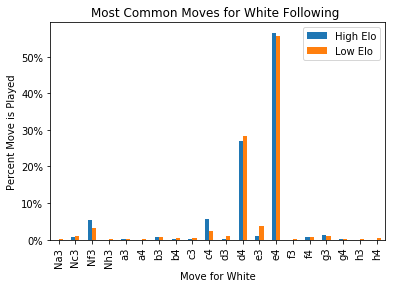

Please enter your move. 
 i.e. e4 or Nf3 
Nf3
['Nf3']
According to my high-elo database the strongest move for white was g3 with a win/loss ratio of 1.42:1.
Computer Plays c5


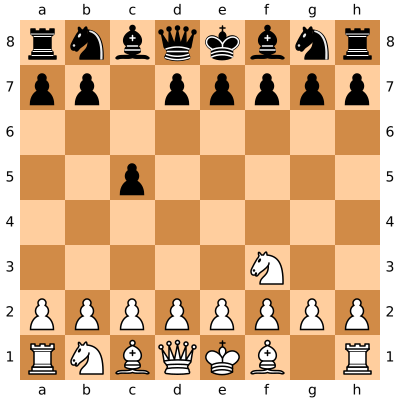

['Nf3', 'c5']


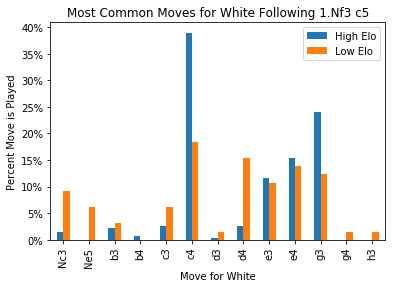

In [ ]:
play()